In [257]:
import pandas as pd
import numpy as np

In [258]:
df_pos = pd.read_csv('../positive/fixed_vol_with_sub_3.csv')

In [259]:
df_pos.shape

(300, 7)

In [260]:
vols = df_pos[['volatility', 'net_price']].to_dict()['volatility'].values()
prices = df_pos[['volatility', 'net_price']].to_dict()['net_price'].values()
mc_prices = df_pos[['volatility', 'monte_carlo_price']].to_dict()['monte_carlo_price'].values()

net_price_to_vol_map = dict(zip(prices, vols))
mc_price_to_vol_map = dict(zip(mc_prices, vols))

In [261]:
se_list = []

for price, vol in net_price_to_vol_map.items():
  if price in mc_price_to_vol_map:
      se_list.append((net_price_to_vol_map[price] - mc_price_to_vol_map[price]) ** 2)

In [262]:
print(np.array(se_list).mean() ** 0.5)

0.02582090901004965


RMSE between net vol and several vols of MC +- CI

In [263]:
se_list = []

for price, vol in net_price_to_vol_map.items():
  for addition in (5 - np.arange(10)) * 1e-3:
    if price + addition in mc_price_to_vol_map:
      se_list.append((net_price_to_vol_map[price] - mc_price_to_vol_map[price + addition]) ** 2)

In [264]:
print(np.array(se_list).mean() ** 0.5)

0.031444511465340025


Confidence interval for vol (only MC)

In [265]:
df_with_ci = pd.read_csv('../fixed_vol_dataset.csv')

In [266]:
vols = df_with_ci[['volatility', 'price_strike_ratio']].to_dict()['volatility'].values()
mc_prices = df_with_ci[['volatility', 'price_strike_ratio']].to_dict()['price_strike_ratio'].values()

mc_price_to_vol_map = dict(zip(mc_prices, vols))

In [267]:
ci_list = []

In [268]:
for index, row in df_with_ci.iterrows():
  if row.left_ci in mc_price_to_vol_map and row.right_ci in mc_price_to_vol_map:
    ci_list.append((mc_price_to_vol_map[row.left_ci] - mc_price_to_vol_map[row.right_ci]) ** 2)

In [269]:
len(ci_list)

9842

In [270]:
np.array(ci_list).mean() ** 0.5

0.02269346095436702

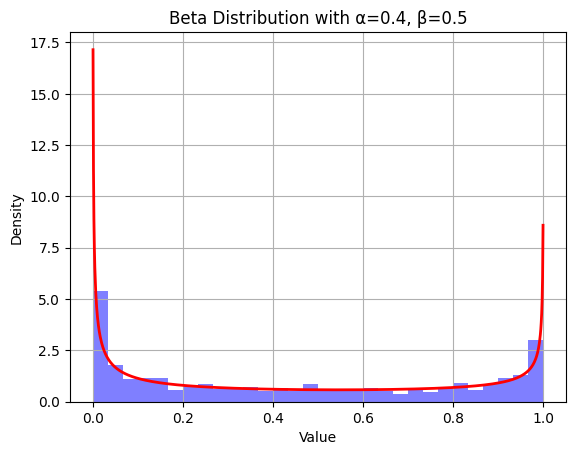

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters for the beta distribution
alpha = 0.4  # Shape parameter α
beta_param = 0.5   # Shape parameter β

# Generate random numbers from the beta distribution
samples = beta.rvs(alpha, beta_param, size=1000)

# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.5, color='b')

# Plot the probability density function (PDF) of the beta distribution
x = np.linspace(0, 1, 1000)
plt.plot(x, beta.pdf(x, alpha, beta_param), 'r-', lw=2)

plt.title('Beta Distribution with α={}, β={}'.format(alpha, beta_param))
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [272]:
beta.rvs(0.5, 0.5, size=10)

array([0.97123995, 0.461958  , 0.58674321, 0.66406614, 0.97571564,
       0.42466741, 0.43034844, 0.75282073, 0.48007219, 0.03629227])